# Exercise 3:

Use and experience methods from previous lessons with given data. Try to search for other pandas methods to analyze the data such as `groupby()` and `query()`. Write functions for repetitive tasks.

TODOs:
- See the spread of pandemic in different countries.
- Plot graphs for Reproduction Rate for different countries side by side or in the same graph.
- Check correlation between deaths and recoveries.
- Compare recoveries between countries.
- Are there any outliers (anomalies)?

[Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)

In [74]:
# Dosyaları okuma ve yollarını verme (yolları doğruddan koplayalınca tek \ unicode olduğu için hata aldım sonrasında \\ olarak değiştirdim.)
import pandas as pd

infected = pd.read_csv("C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_confirmed_global.csv")
recovered = pd.read_csv("C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_recovered_global.csv")
deaths = pd.read_csv("C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_deaths_global.csv")

In [75]:
# Sütun başlıklarını ve veri yapılarını keşfediyoruz.
print(infected.head())


  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  \
0        0        0        0  ...   19551   20342   20917   21459    22142   
1        0        0        0  ...    1232    1246    1263    1299     1341   
2        0        0        0  ...   10050   10154   10265   10382    10484   
3        0        0        0  ...     852     852     852     852      852   
4        0        0        0  ...      88      91      92      96      113   

   6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  
0

In [76]:
print(recovered.head())


  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/6/20  6/7/20  6/8/20  6/9/20  6/10/20  \
0        0        0        0  ...    1830    1875    2171    2651     3013   
1        0        0        0  ...     925     938     945     960      980   
2        0        0        0  ...    6631    6717    6799    6951     7074   
3        0        0        0  ...     741     744     751     757      759   
4        0        0        0  ...      24      24      38      38       40   

   6/11/20  6/12/20  6/13/20  6/14/20  6/15/20  
0

In [77]:
print(sorted(infected["Country/Region"].unique()))


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

In [78]:
print(len(infected["Country/Region"].unique()))


188


 # See the spread of pandemic in different countries.
Farklı ülkelerde pandeminin yayılımını gözlemleyin.

In [79]:
import pandas as pd
import plotly.graph_objects as go

# Veriyi yükle
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_confirmed_global.csv")

# Temizlik: Gereksiz sütunları çıkar
df = df.drop(columns=["Province/State", "Lat", "Long"])

# Ülkelere göre grupla
df_grouped = df.groupby("Country/Region").sum()

# 🇨🇳 🇹🇷 🇺🇸 🇮🇳 🇩🇪 Seçilen ülkeler
selected_countries = ["Turkey", "China", "India", "US", "Germany"]
selected_data = df_grouped.loc[selected_countries]

# Transpose: Tarihler satır, ülkeler sütun olacak
selected_data = selected_data.transpose()
selected_data.index = pd.to_datetime(selected_data.index, format="%m/%d/%y")

# İnteraktif grafik
fig = go.Figure()

for country in selected_data.columns:
    fig.add_trace(go.Scatter(
        x=selected_data.index,
        y=selected_data[country],
        mode='lines+markers',
        name=country,
        hovertemplate=f"<b>{country}</b><br>%{{x|%Y-%m-%d}}<br>Vaka: %{{y:,}}<extra></extra>"
    ))

fig.update_layout(
    title="COVID-19 Toplam Vaka Sayıları (İnteraktif)",
    xaxis_title="Tarih",
    yaxis_title="Toplam Vaka Sayısı",
    hovermode="x unified",
    template="plotly_dark",
    width=1000,
    height=600
)

fig.show()


# Plot graphs for Reproduction Rate for different countries side by side or in the same graph.
Farklı ülkeler için yayılma oranı (Reproduction Rate) grafiklerini yan yana veya aynı grafikte çizin.

# R DEĞERİ NEDİR VE NASIL HESAPLANIR 

R değeri, yani Reproduction Rate (R), bir bulaşıcı hastalığın (COVID-19 gibi) yayılma hızını ölçen bir değerdir. Bu değer, bir hasta veya enfekte olmuş kişi başına kaç yeni vaka ortaya çıkacağına dair bir ölçüdür. Yani, R değeri şunları gösterir:

R > 1: Bir kişi, 1'den fazla kişiyi enfekte ediyorsa, bu, salgının yayıldığı anlamına gelir.

R = 1: Bir kişi yalnızca 1 kişiyi enfekte ediyorsa, salgın stabil bir hızda devam ediyor demektir.

R < 1: Bir kişi, 1'den az kişiyi enfekte ediyorsa, salgın yavaşlıyor ve sonunda sona erebilir.

R = Yeni vaka sayısı / Önceki günün vaka sayısı

In [80]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Verilerinizi buraya yükleyin
infected = pd.read_csv("C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_confirmed_global.csv")

# Veriyi düzenleyelim ve sadece üç ülkeyi seçelim
countries = ['Turkey', 'US', 'China']

# 'Country/Region' sütununda belirtilen ülkeleri seçelim ve veriyi gruplayalım
data = infected[infected['Country/Region'].isin(countries)]

# Province/State, Lat, Long gibi gereksiz sütunları çıkarıyoruz
data = data.drop(columns=['Province/State', 'Lat', 'Long'])

# Ülkelere göre toplam vakaları gruplayarak, her ülkenin verilerini topluyoruz
data = data.groupby('Country/Region').sum()

# Veriyi tarihe göre transpoze ediyoruz
data = data.transpose()

# NaN değerlerini sıfırla dolduruyoruz
data = data.fillna(0)

# Ülkelerin zaman serisi verileri üzerinde günlük vaka farklarını hesaplıyoruz
daily_cases = data.diff(axis=0)

# Günlük vakalar üzerinden R değerini hesaplıyoruz (bir önceki gün ile fark alarak)
R_values = daily_cases / daily_cases.shift(1, axis=0)

# Grafikleri yan yana gösterebilmek için subplotlar oluşturuyoruz
fig = make_subplots(rows=1, cols=3, subplot_titles=countries)

# Her ülke için ayrı ayrı R değeri grafiği ekliyoruz
for i, country in enumerate(countries):
    if country in R_values.columns:
        fig.add_trace(go.Scatter(x=R_values.index, y=R_values[country],
                                 mode='lines', name=country),
                      row=1, col=i+1)

# Grafik başlığını ekliyoruz
fig.update_layout(title_text="Reproduction Rate (R) for Selected Countries")

# Grafik eksenlerini güncelliyoruz
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="R Value")

# Grafiği gösteriyoruz
fig.show()


# Check correlation between deaths and recoveries.
Ölümler ile iyileşmeler arasındaki korelasyonu kontrol edin.

In [81]:
import pandas as pd
import plotly.express as px

# Verileri yükle
deaths = pd.read_csv("C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_recovered_global.csv")

# Tarih sütunlarını al (ilk 4 sütunu atla), dünya geneli toplamları al
death_ts = deaths.iloc[:, 4:].sum()
recovered_ts = recovered.iloc[:, 4:].sum()

# DataFrame olarak birleştir
df = pd.DataFrame({
    'Deaths': death_ts.values,
    'Recovered': recovered_ts.values
}, index=pd.to_datetime(death_ts.index))

# Korelasyonu hesapla
correlation_matrix = df.corr()
correlation = correlation_matrix.loc['Deaths', 'Recovered']
print(f"📈 Pearson korelasyon katsayısı: {correlation:.4f}")

# Plotly ile görselleştirme
fig = px.scatter(df, x='Deaths', y='Recovered', 
                 title=f'Deaths vs Recoveries (Pearson Correlation: {correlation:.4f})', 
                 labels={'Deaths': 'Deaths', 'Recovered': 'Recoveries'},
                 hover_data={'Deaths': True, 'Recovered': True, 'index': df.index.strftime('%Y-%m-%d')})

# Görselleştirme ayarları
fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title_x=0.5, title_y=0.95)

# Grafiği göster
fig.show()


📈 Pearson korelasyon katsayısı: 0.9574


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18396\1581517736.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



# Compare recoveries between countries.
Ülkeler arasındaki iyileşme sayılarını karşılaştırın.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18396\1287866600.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




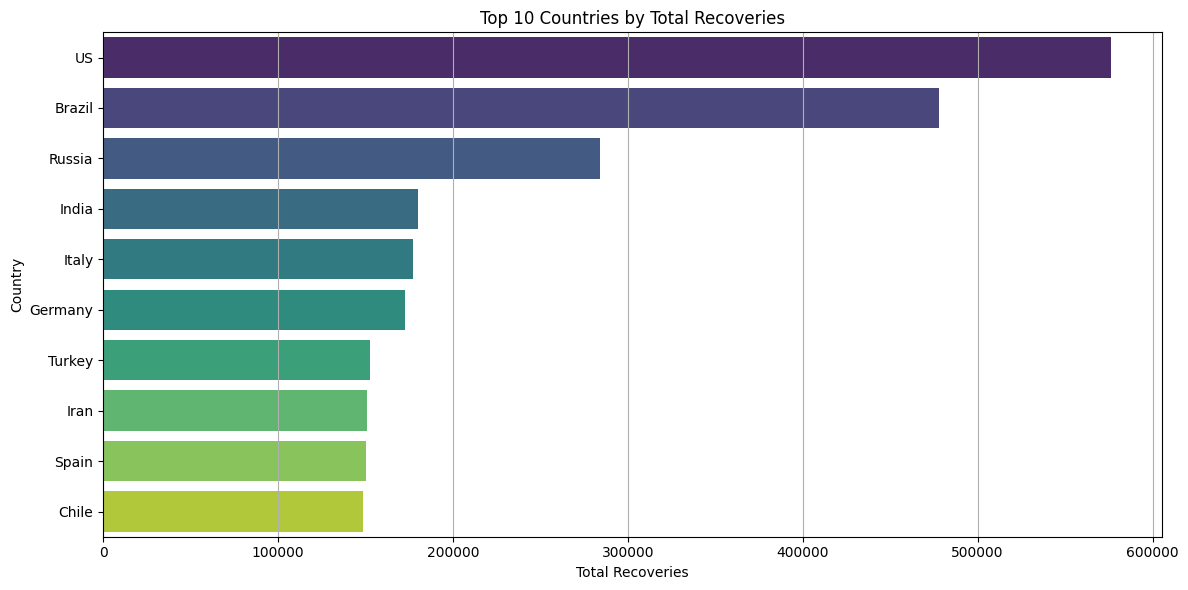

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verileri yükle
recovered = pd.read_csv("C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_recovered_global.csv")

# Ülke bazında grupla ve zaman içindeki iyileşmeleri topla
country_recoveries = recovered.groupby("Country/Region").sum(numeric_only=True).iloc[:, 3:]

# Her ülkenin son sütunundaki değeri (yani en güncel toplam iyileşme sayısını) al
latest_recoveries = country_recoveries.iloc[:, -1].sort_values(ascending=False)

# İlk 10 ülkeyi seç
top_countries = latest_recoveries.head(10)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Total Recoveries")
plt.xlabel("Total Recoveries")
plt.ylabel("Country")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


# Are there any outliers (anomalies)?

# Outlier ne demek 

Outlier, verinin genel deseninden çok farklı olan gözlemlerdir. Biz burada günlük artışları (daily_change) inceledik. Yani:

Her günkü vaka/sayı artışını aldık: ts.diff()

Bu sayıların z-score değerini hesapladık:

Z-score: Her değerin ortalamadan kaç standart sapma uzaklıkta olduğunu gösterir.

Eğer bir günün değeri ortalamanın 3 katı (veya daha fazla) sapmışsa, onu aykırı (outlier) kabul ettik.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18396\2444542983.py:18: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18396\2444542983.py:18: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18396\2444542983.py:18: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



📊 Confirmed - Aykırı gün sayısı: 0
Series([], dtype: float64) 

📊 Deaths - Aykırı gün sayısı: 0
Series([], dtype: float64) 

📊 Recovered - Aykırı gün sayısı: 1
2020-06-08    151598.0
dtype: float64 



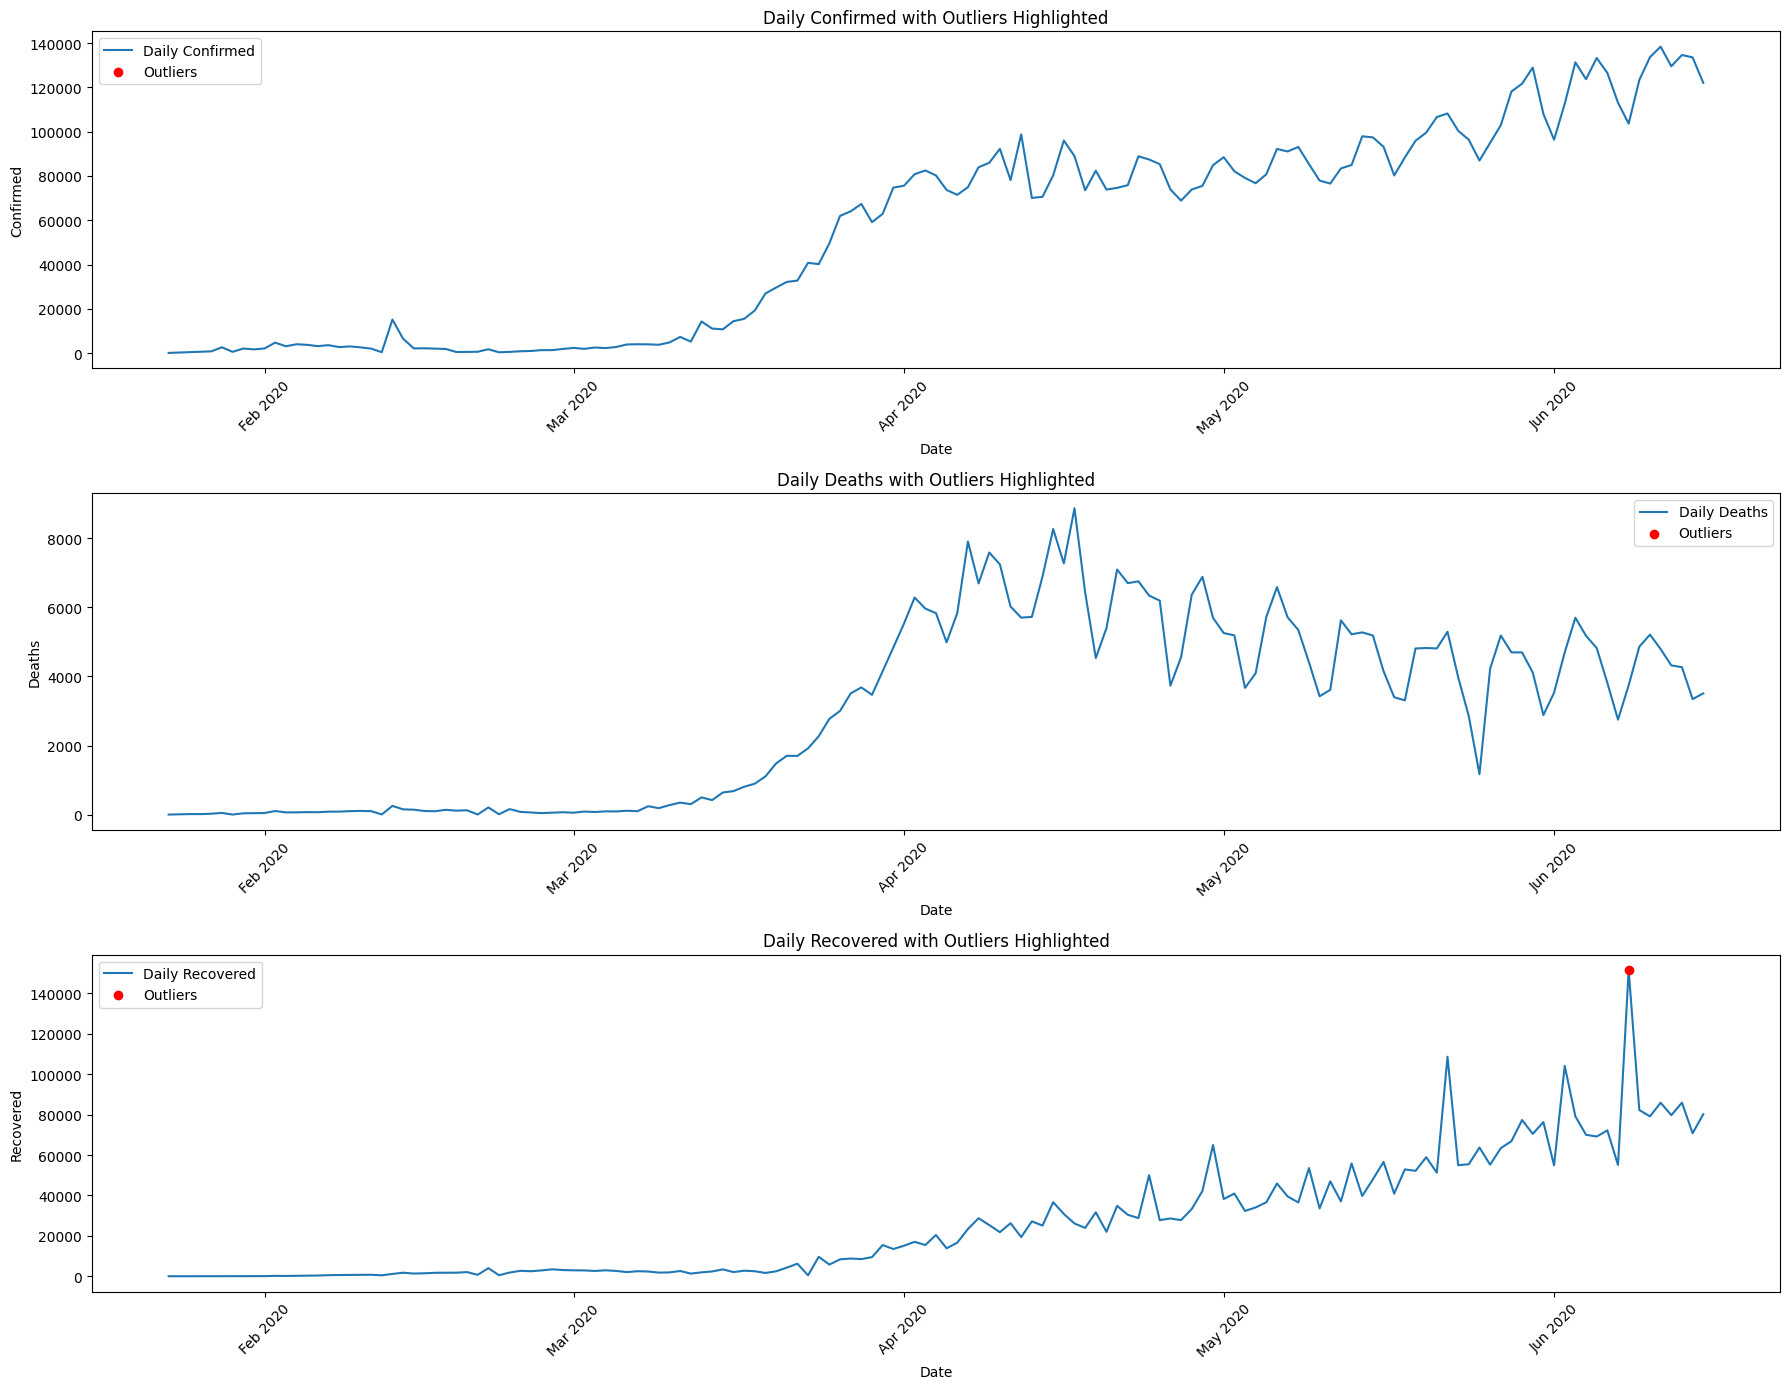

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Dosya yolları
paths = {
    "Confirmed": "C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_confirmed_global.csv",
    "Deaths": "C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_deaths_global.csv",
    "Recovered": "C:\\Users\\ASUS\\Desktop\\.github\\kizkardes-data-science\\datas\\time_series_covid19_recovered_global.csv"
}

plt.figure(figsize=(18, 14))

for i, (label, path) in enumerate(paths.items(), 1):
    df = pd.read_csv(path)
    ts = df.iloc[:, 4:].sum()
    ts.index = pd.to_datetime(ts.index)
    daily_change = ts.diff().dropna()

    # Z-score ile aykırı değer analizi
    z_scores = zscore(daily_change)
    threshold = 3
    outliers = daily_change[abs(z_scores) > threshold]

    # Alt grafik
    plt.subplot(3, 1, i)
    sns.lineplot(x=daily_change.index, y=daily_change.values, label=f'Daily {label}', linewidth=1.5)
    plt.scatter(outliers.index, outliers.values, color='red', label='Outliers', zorder=5)

    # Daha seyrek tarih gösterimi (ay başlangıçları gibi)
    xticks = pd.date_range(start=daily_change.index.min(), end=daily_change.index.max(), freq='MS')
    plt.xticks(ticks=xticks, labels=xticks.strftime('%b %Y'), rotation=45)

    plt.title(f'Daily {label} with Outliers Highlighted')
    plt.xlabel("Date")
    plt.ylabel(label)
    plt.legend()

    # Konsola yazdır
    print(f"📊 {label} - Aykırı gün sayısı: {len(outliers)}")
    print(outliers, "\n")

plt.tight_layout()
plt.show()
